<a href="https://colab.research.google.com/github/everval/AQM2021/blob/main/Lecture2_after.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability Distributions and the Central Limit Theorem 

Every day we are confronted with situations with uncertain outcomes: the flipping of a coin, roll of a dice. These experiments have in common that the outcome is not predetermined. This in the sense that before we run the experiment, we do not know the outcome.

The above are classical, and intuitive, experiments in probability. Nonetheless, we encounter several measures of uncertainty when working with data: sampling, input errors. 

We are interested in modelling and measuring these uncertainties, using probability theory, to take better informed decisions.


## Normal distribution

Today, we start by discussing the Normal distribution, the most used probability distribution.

As usual, we start by loading the Python packages that we are going to use in the analysis. Remembering to load also the random package.


In [ ]:
import numpy as np #Package for numerical multidimensional tables
import pandas as pd #Package for data frames
import matplotlib.pyplot as plt #Package for plots and graphs
import random as rnd #Package for random number generation

Formally, the Normal distribution is a **continous** distribution. That is, it takes values on a continuum of values. In its case, the whole real line.

We say that $X$ follows the Normal distribution with mean $\mu$ and standard deviation $\sigma$ if its probabiliy density function (or **pdf** for short), $f(x)$ is given by
$$f(x) = \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}.$$

We write $X\sim N(\mu,\sigma)$ to denote that $X$ follows the Normal distribution with mean $\mu$ and standard deviation $\sigma$.

We can use the probability density function to obtain a graph of the distribution.

We make $\mu=0$ and $\sigma=1$ to obtain the **standard Normal distribution**.

The standard Normal takes its name from the fact that we can standardize any other Normal variable.

> Let $X\sim N(\mu,\sigma)$ and let $$Y=\frac{X-\mu}{\sigma},$$ then $Y\sim N(0,1)$.

Recall to import **norm** from the scipy.stats package to have access to functions associated to the Normal distribution.

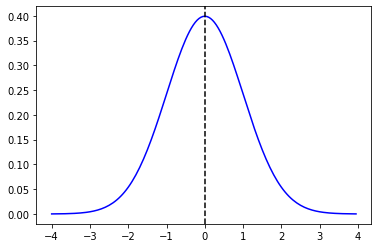

In [ ]:
from scipy.stats import norm #Import the Normal distribution from the scipy.stats package

vals = list(np.arange(-4,4,0.05))  #We use the np.arange() function to generate a list of real numbers
                                  #np.arange() extends the range() function for integer numbers

norvals = norm.pdf(vals,loc=0,scale=1) #Evaluating the pdf

plt.plot(vals,norvals,color="blue")  #Plotting the density
plt.axvline(0,color="black",linestyle="--")    #Adding vertical line at the mean
plt.show()

Some properties of the Normal distribution:

* It has a *bell shape*.
* Is symmetrical around the mean or location parameter.
* It has a unique maximum: unimodal.
* The mean is the same as the median and the mode.


The mean of the distribution determines the location of the center of the graph. 

The shape of the graph does not change by changing the mean, but the graph is translated horizontally.

The standard deviation or *scale* parameter does change the shape (as you will show in the exercises).

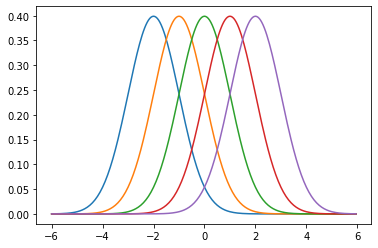

In [ ]:
new_vals = list(np.arange(-6,6,0.05))  #New grid
val_locs = [-2, -1, 0, 1, 2]    #Different location parameters

for i in range(0,5):
    plt.plot(new_vals,norm.pdf(new_vals,loc=val_locs[i],scale=1)) #A plot for each location parameter

plt.show()

### Computing probabilities

The Normal distribution can take all values in the real line (recall that it is continuous).

Given that it is a probability distribution, the probability for all possible values should *add* to 1. For continuous distributions, the *sum* is replaced by the integral.

Thus, 
$$\int_{-\infty}^{\infty} f(x) = \int_{-\infty}^{\infty} \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2} = 1$$

Contrasting the Normal distribution against the binomial, a discrete distribution.

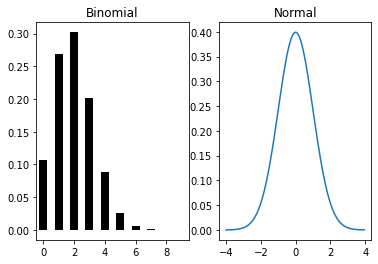

In [ ]:
from scipy.stats import binom  #Importing the binomial distribution

plt.subplot(1, 2, 1)
bin_vals = np.arange(0, 10)  
binomial = binom.pmf(bin_vals, n=10, p=0.2)  #Evaluate the probability
plt.vlines(bin_vals ,0, binomial, linewidth=8)
plt.title('Binomial')

plt.subplot(1, 2, 2)
vals = list(np.arange(-4,4,0.05))  
norvals = norm.pdf(vals,loc=0,scale=1) #Evaluating the pdf
plt.plot(vals,norvals)  #Plotting the density
plt.title('Normal')

plt.show()

Recall that all probabilities should sum to 1.

In [ ]:
sum(binomial)

0.9999998976000005

For continuous distributions, we compute probabilities by
$$Pr(a<X<b) = \int_{a}^{b} f(x).$$


For example, we can show how to compute $Pr(X<1)$ graphically.

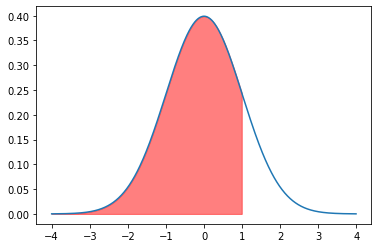

In [ ]:
vals = np.arange(-4,4,0.01)
plt.plot(vals, norm.pdf(vals))

probx = np.arange(-4,1,0.01)
plt.fill_between(probx,norm.pdf(probx),alpha=0.5, color='r')

plt.show()

We can evaluate the probability directly.

In [ ]:
norm.cdf(1)

0.8413447460685429

Another useful property of the Normal distribution is that approximately 95% of the probability is contained in the interval given by 
$$[\mu-2*\sigma,\mu+2*\sigma].$$

In [ ]:
mu = 10
sig = 1
norm.cdf(mu+2*sig,loc=mu,scale=sig)-norm.cdf(mu-2*sig,loc=mu,scale=sig)

0.9544997361036416

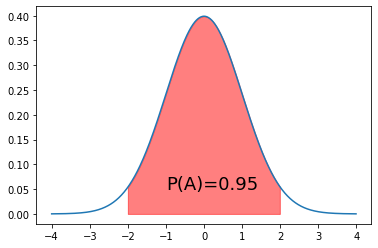

In [ ]:
vals = np.arange(-4,4,0.01)
plt.plot(vals, norm.pdf(vals))

probx = np.arange(-2,2,0.01)
plt.fill_between(probx,norm.pdf(probx),alpha=0.5, color='r')
plt.text(-1,0.05,"P(A)=0.95",fontsize=18)
plt.show()

### Random Normal number generation

For some analysis, like Monte Carlo simulation discussed last time, it may be useful to draw samples from the Normal distribution.

We can accomplish this by using the *norm.rvs()* function.

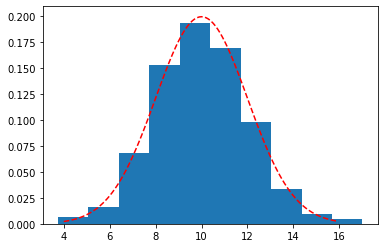

In [ ]:
sample = norm.rvs(loc=10,scale=2,size=1000) #Generating a random sample

vals = np.arange(4,16,0.1)  #Making a new grid
nor_vals = norm.pdf(vals,loc=10,scale=2) #Evaluating the Normal pdf at the grid values

plt.hist(sample, bins=10, density =True) #Creating the histogram of the random sample
                                        #We make the option density true so the bins sum to 1

plt.plot(vals,nor_vals,color="red",linestyle="--") #Adding the theoretical density
plt.show()

### Our Simpsons example

We compare the histogram from The Simpsons ratings dataset to a Normal distribution with same mean and standard deviation.

First we load the data.

In [ ]:
from google.colab import files

uploaded = files.upload()
simpsons = pd.read_csv('Simpsons_ratings.csv')
print(simpsons)

Saving Simpsons_ratings.csv to Simpsons_ratings.csv
     Season  Episode                                Title  Year  Votes  Rating
0         1        1    Simpsons Roasting on an Open Fire  1989   6681     8.2
1         1        2                      Bart the Genius  1990   4358     7.7
2         1        3                      Homer's Odyssey  1990   3828     7.4
3         1        4        There's No Disgrace Like Home  1990   3785     7.7
4         1        5                     Bart the General  1990   4054     8.0
..      ...      ...                                  ...   ...    ...     ...
700      32       18                         Burger Kings  2021    323     6.9
701      32       19  Panic on the Streets of Springfield  2021    425     6.2
702      32       20             Mother and Child Reunion  2021    291     7.2
703      32       21            The Man from G.R.A.M.P.A.  2021    253     6.5
704      32       22                  The Last Barfighter  2021    301     7.7


We then create the histogram and compute the mean and standard deviation to add the Normal distribution.

[7.197446808510636, 0.8418448200656555]

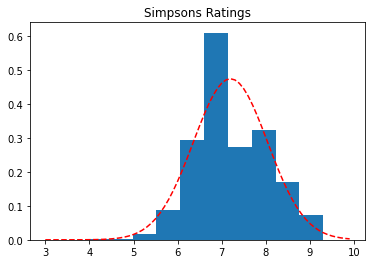

In [ ]:
plt.hist(simpsons['Rating'], bins=10, density=True) #Creating the histogram of the random sample
                                        #We make the option density true so the bins sum to 1
plt.title('Simpsons Ratings')

mean_simpsons = np.mean(simpsons['Rating'])
std_simpsons = np.std(simpsons['Rating'])

display([mean_simpsons,std_simpsons])

vals = np.arange(3,10,0.1)  #Making a new grid
nor_vals = norm.pdf(vals,loc=mean_simpsons,scale=std_simpsons) #Evaluating the Normal

plt.plot(vals,nor_vals,color="red",linestyle="--") #Adding the theoretical density
plt.show()

The histogram does not exactly corresponds to the Normal distribution. 

This could be given that the data indeed does not follow a Normal distribution, or sampling uncertainty as our simulated example above.

447    6.7
370    6.4
286    7.7
628    6.7
130    8.4
      ... 
536    6.7
475    6.9
17     7.4
377    6.3
417    7.1
Name: Rating, Length: 200, dtype: float64

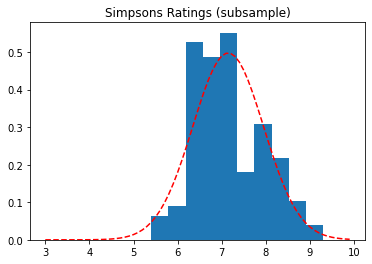

In [ ]:
this_sample = simpsons['Rating'].sample(n=200,replace=True)
display(this_sample)

plt.hist(this_sample, bins=10, density=True) #Creating the histogram of the random sample
                                        #We make the option density true so the bins sum to 1
plt.title('Simpsons Ratings (subsample)')

mean_sample = np.mean(this_sample)
std_sample = np.std(this_sample)

nor_vals = norm.pdf(vals,loc=mean_sample,scale=std_sample) #Evaluating the Normal

plt.plot(vals,nor_vals,color="red",linestyle="--") #Adding the theoretical density
plt.show()

## Central Limit Theorem

In the previous lecture, we talked about the law of large numbers. It states that
$\bar{X}\to\mu$ as $n\to\infty$, or, in other words, that $\bar{X}\approx\mu$ if $n$ is large.

Nonetheless, the law of large numbers does not tells us how accurate this approximation is. Nor it tells us the speed to which it *converges*.

The next theorem gives the answer.

> **Central Limit Theorem (CLT)**: Let $X_1,X_2,\cdots,X_n$ be a sequence of i.i.d. random variables with mean $\mu$ and standard deviation $\sigma$. Let $\bar{X}=\frac{1}{n}(X_1+X_2+\cdots+X_n)$ be the sample mean. Then, 
$$\bar{X}\xrightarrow[]{d}N(\mu,\frac{\sigma}{\sqrt{n}})$$

In words, the CLT tells us that the sampling distribution of the sample mean is, at least approximately, normally distributed, regardless of the distribution of the underlying random sample. 

In fact, the CLT applies regardless of whether the distribution of the $X_i$ is discrete (for example, Poisson or binomial) or continuous (for example, exponential or chi-square).

### Monte Carlo Simulation

Building on the idea of last lecture, we use Monte Carlo simulation to see the CLT in action.

Recall that our coin game is discrete. There are only two possible outcomes with equal probability.

In [ ]:
def coin_flip(p):
    return(1*(rnd.random()>=p))

def game(n,p=0.5):
    draw = []
    for i in range(0,n):
            draw.append(coin_flip(p))
    return(draw)

coin_mean = np.mean(game(10))
display(coin_mean)


0.6

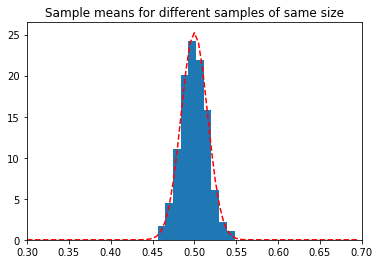

In [ ]:
xbars = []
N = 1000     #Size of the sample
n = 1000    #Number of samples

for i in range(0,n):
  xbars.append(np.mean(game(N)))

plt.hist(xbars,bins=10,density=True)
plt.title('Sample means for different samples of same size')

mean_xbars = 0.5
mean_xbars_other = np.mean(xbars)
std_xbars = np.sqrt(0.25)/np.sqrt(N)
vals = np.arange(mean_xbars-0.2,mean_xbars+0.2,0.005)  #Making a new grid
nor_vals = norm.pdf(vals,loc=mean_xbars,scale=std_xbars) #Evaluating the Normal

plt.plot(vals,nor_vals,color="red",linestyle="--") #Adding the theoretical density
plt.xlim(mean_xbars-0.2,mean_xbars+0.2)
plt.show()

The CLT tells us the *speed* to which the sample means converge to the theoretical mean. 

In particular, the $\sqrt{n}$ term tells us that the sample means converge at *square root speed*.

Bigger sample sizes are always better. But in practical terms, we need to square the size of the sample to see a *significant* better approximation. 

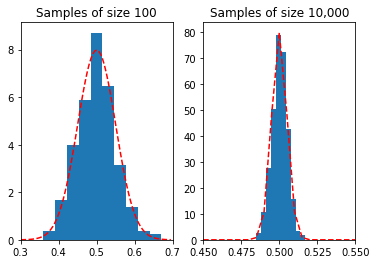

In [ ]:
xbars100 = []
xbars10000 = []
n = 1000    #Number of samples

for i in range(0,N):
  xbars100.append(np.mean(game(100)))
  xbars10000.append(np.mean(game(10000)))

plt.subplot(1,2,1)
plt.hist(xbars100,bins=10,density=True)
plt.title('Samples of size 100')
mean_xbars = 0.5
std_xbars100 = np.sqrt(0.25)/np.sqrt(100)
vals = np.arange(mean_xbars-0.2,mean_xbars+0.2,0.005)  #Making a new grid
nor_vals = norm.pdf(vals,loc=mean_xbars,scale=std_xbars100) #Evaluating the Normal
plt.plot(vals,nor_vals,color="red",linestyle="--") #Adding the theoretical density
plt.xlim(mean_xbars-0.2,mean_xbars+0.2)

plt.subplot(1,2,2)
plt.hist(xbars10000,bins=10,density=True)
plt.title('Samples of size 10,000')
mean_xbars = 0.5
std_xbars10000 = np.sqrt(0.25)/np.sqrt(10000)
vals = np.arange(mean_xbars-0.05,mean_xbars+0.05,0.005)  #Making a new grid
nor_vals = norm.pdf(vals,loc=mean_xbars,scale=std_xbars10000) #Evaluating the Normal
plt.plot(vals,nor_vals,color="red",linestyle="--") #Adding the theoretical density
plt.xlim(mean_xbars-0.05,mean_xbars+0.05)

plt.show()

### Our Simpsons example

To show the CLT in work, we need several samples of Simpsons ratings. Nonetheless, we only have access to one sample. 

One way to generate *new* datasets from a given one is to sample with replacement.

Note: If we select the same sample size as the original sample, the method is called **bootstrap**.

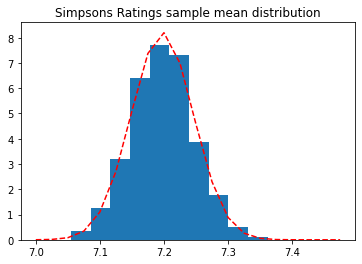

In [ ]:
samsize = 300 #Sample size
numsam = 1000  #Number of samples

simpsons_means = []

for i in range(0,numsam):
  this_sample = simpsons['Rating'].sample(n=samsize,replace=True)
  simpsons_means.append(np.mean(this_sample))

plt.hist(simpsons_means, bins=10, density=True) #Creating the histogram of the random sample
                                        #We make the option density true so the bins sum to 1
plt.title('Simpsons Ratings sample mean distribution')

std_all = np.std(simpsons_means)
std_other = std_simpsons/np.sqrt(300)
vals = np.arange(7,7.5,0.025)
nor_vals = norm.pdf(vals,loc=mean_simpsons,scale=std_other) #Evaluating the Normal

plt.plot(vals,nor_vals,color="red",linestyle="--") #Adding the theoretical density
plt.show()

The Normal distribution looks like a good fit, which is not surprising given the CLT. 

Recalling the mean and standard deviation from the **whole** sample, we can write the distribution for the sample mean of the Simpsons ratings.



In [ ]:
display([mean_simpsons,std_simpsons])

mu = mean_simpsons
sigma = std_simpsons/np.sqrt(705)

display([mu,sigma])

[7.197446808510636, 0.8418448200656555]

[7.197446808510636, 0.03170571018377085]

Given the CLT, the Simpsons ratings follow a $N(7.197,0.032)$ distribution. 

We can use this distribution to compute the probabiliy that the sample mean for the Simpsons ratings is above Family Guy's sample mean (as you will do in the exercises).